In [1]:
import matplotlib.pyplot
import scipy.stats
import numpy
import pandas
import seaborn
%matplotlib inline

In [78]:
tips = pandas.read_csv("https://fxjollois.github.io/donnees/tips.csv", header = 0, sep = ",")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [54]:
type(tips)

pandas.core.frame.DataFrame

In [3]:
type(tips)

pandas.core.frame.DataFrame

In [15]:
#tips.head(10)
#tips.shape
#tips.count()
#tips.info()
#tips.columns
list(tips)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [19]:
#tips.query('total_bill > 48') # que les factures de plus de 48
#tips.query('day.isin(("Sat", "Sun"))') # que les factures ayant eu lieu un samedi ou un dimanche
tips.query('size > 4 & sex == "Male"') # que les tables de plus de 4 convives et payées par un homme


,total_bill,tip,sex,smoker,day,time,size
141,34.30,6.7,Male,No,Thur,Lunch,6
142,41.19,5.0,Male,No,Thur,Lunch,5
156,48.17,5.0,Male,No,Sun,Dinner,6
185,20.69,5.0,Male,No,Sun,Dinner,5
187,30.46,2.0,Male,Yes,Sun,Dinner,5
216,28.15,3.0,Male,Yes,Sat,Dinner,5


In [24]:
a = 48
b = {"a": 48}
print(b)
tips.query("total_bill > @b['a']") # idem première ligne ci-dessus

{'a': 48}


,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


In [36]:
#tips.filter(["sex", "total_bill"]) # que sex et total_bill donc
#tips.filter(like = "ti") # que les variables ayant "ti" dans leur nom
tips.filter(regex = "t.*i") # que les variables ayant la lettre "t" puis la lettre "i" (avec ou sans caractères entre)


,total_bill,tip,time
ind1,16.99,1.01,Dinner
ind2,10.34,1.66,Dinner
ind3,21.01,3.50,Dinner
ind4,23.68,3.31,Dinner
ind5,24.59,3.61,Dinner
...,...,...,...
ind240,29.03,5.92,Dinner
ind241,27.18,2.00,Dinner
ind242,22.67,2.00,Dinner
ind243,17.82,1.75,Dinner


In [27]:
a = tips
a.index = ["ind" + str(i+1) for i in range(244)]
a

,total_bill,tip,sex,smoker,day,time,size
ind1,16.99,1.01,Female,No,Sun,Dinner,2
ind2,10.34,1.66,Male,No,Sun,Dinner,3
ind3,21.01,3.50,Male,No,Sun,Dinner,3
ind4,23.68,3.31,Male,No,Sun,Dinner,2
ind5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
ind240,29.03,5.92,Male,No,Sat,Dinner,3
ind241,27.18,2.00,Female,Yes,Sat,Dinner,2
ind242,22.67,2.00,Male,Yes,Sat,Dinner,2
ind243,17.82,1.75,Male,No,Sat,Dinner,2


In [31]:
a.filter(["ind1", "ind100"], axis=0)

,total_bill,tip,sex,smoker,day,time,size
ind1,16.99,1.01,Female,No,Sun,Dinner,2
ind100,12.46,1.50,Male,No,Fri,Dinner,2


In [38]:
tips.filter(["sex", "smoker"]).drop_duplicates()

,sex,smoker
ind1,Female,No
ind2,Male,No
ind57,Male,Yes
ind68,Female,Yes


In [41]:
#tips.sort_values(by = "total_bill") # Tri par total croissant
#tips.sort_values(by = "total_bill", ascending = False) # Tri décroissant
tips.sort_values(by = ["smoker", "total_bill"], ascending = [True, False]) # Tri avec smoker croissant et total décroissant


,total_bill,tip,sex,smoker,day,time,size
ind213,48.33,9.00,Male,No,Sat,Dinner,4
ind60,48.27,6.73,Male,No,Sat,Dinner,4
ind157,48.17,5.00,Male,No,Sun,Dinner,6
ind143,41.19,5.00,Male,No,Thur,Lunch,5
ind24,39.42,7.58,Male,No,Sat,Dinner,4
...,...,...,...,...,...,...,...
ind223,8.58,1.92,Male,Yes,Fri,Lunch,1
ind219,7.74,1.44,Male,Yes,Sat,Dinner,2
ind173,7.25,5.15,Male,Yes,Sun,Dinner,2
ind93,5.75,1.00,Female,Yes,Fri,Dinner,2


In [47]:
#tips.head() # 5 premières lignes par défaut
#tips.head(10) # 10 premières lignes
a = tips.sort_values(by = "total_bill", ascending = False).tail(3) # 3 dernières lignes
a

,total_bill,tip,sex,smoker,day,time,size
ind173,7.25,5.15,Male,Yes,Sun,Dinner,2
ind93,5.75,1.00,Female,Yes,Fri,Dinner,2
ind68,3.07,1.00,Female,Yes,Sat,Dinner,1


In [48]:
a.head(1)

,total_bill,tip,sex,smoker,day,time,size
ind173,7.25,5.15,Male,Yes,Sun,Dinner,2


In [49]:
tips['n_row'] = range(244)
tips['nouv'] = "nouvelle valeur"
tips

,total_bill,tip,sex,smoker,day,time,size,n_row,nouv
ind1,16.99,1.01,Female,No,Sun,Dinner,2,0,nouvelle valeur
ind2,10.34,1.66,Male,No,Sun,Dinner,3,1,nouvelle valeur
ind3,21.01,3.50,Male,No,Sun,Dinner,3,2,nouvelle valeur
ind4,23.68,3.31,Male,No,Sun,Dinner,2,3,nouvelle valeur
ind5,24.59,3.61,Female,No,Sun,Dinner,4,4,nouvelle valeur
...,...,...,...,...,...,...,...,...,...
ind240,29.03,5.92,Male,No,Sat,Dinner,3,239,nouvelle valeur
ind241,27.18,2.00,Female,Yes,Sat,Dinner,2,240,nouvelle valeur
ind242,22.67,2.00,Male,Yes,Sat,Dinner,2,241,nouvelle valeur
ind243,17.82,1.75,Male,No,Sat,Dinner,2,242,nouvelle valeur


In [53]:
# attention ici, l.size ferait référence à la taille de l, car c'est un mot clé de python
tips.assign(per_person = lambda l: round(l['total_bill'] / l['size'], 2),
            test = range(244))


,total_bill,tip,sex,smoker,day,time,size,n_row,nouv,per_person,test
ind1,16.99,1.01,Female,No,Sun,Dinner,2,0,nouvelle valeur,8.49,0
ind2,10.34,1.66,Male,No,Sun,Dinner,3,1,nouvelle valeur,3.45,1
ind3,21.01,3.50,Male,No,Sun,Dinner,3,2,nouvelle valeur,7.00,2
ind4,23.68,3.31,Male,No,Sun,Dinner,2,3,nouvelle valeur,11.84,3
ind5,24.59,3.61,Female,No,Sun,Dinner,4,4,nouvelle valeur,6.15,4
...,...,...,...,...,...,...,...,...,...,...,...
ind240,29.03,5.92,Male,No,Sat,Dinner,3,239,nouvelle valeur,9.68,239
ind241,27.18,2.00,Female,Yes,Sat,Dinner,2,240,nouvelle valeur,13.59,240
ind242,22.67,2.00,Male,Yes,Sat,Dinner,2,241,nouvelle valeur,11.34,241
ind243,17.82,1.75,Male,No,Sat,Dinner,2,242,nouvelle valeur,8.91,242


In [56]:
#tips.filter(["total_bill", "tip", "size"]).aggregate(["count", "mean"])
tips.filter(["total_bill", "tip", "size"]).mean()

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

In [61]:
tips.filter(["sex", "total_bill", "tip", "size"]).groupby("sex").mean()

,total_bill,tip,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [71]:
tips.mean()

total_bill     19.785943
tip             2.998279
size            2.569672
n_row         121.500000
dtype: float64

In [64]:
tips.filter(["sex", "smoker", "total_bill", "tip", "size"]) \
    .groupby(["sex", "smoker"]) \
    .mean()

total_bill       tip      size
sex    smoker                                
Female No       18.105185  2.773519  2.592593
       Yes      17.977879  2.931515  2.242424
Male   No       19.791237  3.113402  2.711340
       Yes      22.284500  3.051167  2.500000

In [72]:
tips

,total_bill,tip,sex,smoker,day,time,size,n_row,nouv
ind1,16.99,1.01,Female,No,Sun,Dinner,2,0,nouvelle valeur
ind2,10.34,1.66,Male,No,Sun,Dinner,3,1,nouvelle valeur
ind3,21.01,3.50,Male,No,Sun,Dinner,3,2,nouvelle valeur
ind4,23.68,3.31,Male,No,Sun,Dinner,2,3,nouvelle valeur
ind5,24.59,3.61,Female,No,Sun,Dinner,4,4,nouvelle valeur
...,...,...,...,...,...,...,...,...,...
ind240,29.03,5.92,Male,No,Sat,Dinner,3,239,nouvelle valeur
ind241,27.18,2.00,Female,Yes,Sat,Dinner,2,240,nouvelle valeur
ind242,22.67,2.00,Male,Yes,Sat,Dinner,2,241,nouvelle valeur
ind243,17.82,1.75,Male,No,Sat,Dinner,2,242,nouvelle valeur


In [73]:
tips2 = tips.melt(id_vars = "n_row")
tips2

,n_row,variable,value
0,0,total_bill,16.99
1,1,total_bill,10.34
2,2,total_bill,21.01
3,3,total_bill,23.68
4,4,total_bill,24.59
...,...,...,...
1947,239,nouv,nouvelle valeur
1948,240,nouv,nouvelle valeur
1949,241,nouv,nouvelle valeur
1950,242,nouv,nouvelle valeur


In [77]:
tips.info()
tips2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, ind1 to ind244
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
 7   n_row       244 non-null    int64  
 8   nouv        244 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 27.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   n_row     1952 non-null   int64 
 1   variable  1952 non-null   object
 2   value     1952 non-null   object
dtypes: int64(1), object(2)
memory usage: 45.9+ KB


In [74]:
pandas.pivot(tips2, index = "n_row", columns = "variable", values = "value")

variable,day,nouv,sex,size,smoker,time,tip,total_bill
n_row,,,,,,,,
0,Sun,nouvelle valeur,Female,2,No,Dinner,1.01,16.99
1,Sun,nouvelle valeur,Male,3,No,Dinner,1.66,10.34
2,Sun,nouvelle valeur,Male,3,No,Dinner,3.50,21.01
3,Sun,nouvelle valeur,Male,2,No,Dinner,3.31,23.68
4,Sun,nouvelle valeur,Female,4,No,Dinner,3.61,24.59
...,...,...,...,...,...,...,...,...
239,Sat,nouvelle valeur,Male,3,No,Dinner,5.92,29.03
240,Sat,nouvelle valeur,Female,2,Yes,Dinner,2.00,27.18
241,Sat,nouvelle valeur,Male,2,Yes,Dinner,2.00,22.67


In [82]:
tips.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [87]:
tips.total_bill.describe()
tips["total_bill"].describe()
tips.total_bill.mean()
tips.total_bill.std()
tips.total_bill.var()
tips.total_bill.min()
tips.total_bill.max()
tips.total_bill.median()
tips.total_bill.quantile([.01, .1, .9, .99])

0.01     7.250
0.10    10.340
0.90    32.235
0.99    48.227
Name: total_bill, dtype: float64

In [89]:
scipy.stats.normaltest(tips.total_bill)
scipy.stats.shapiro(tips.total_bill)

ShapiroResult(statistic=0.9197188019752502, pvalue=3.3245434183371003e-10)

<AxesSubplot:ylabel='Density'>

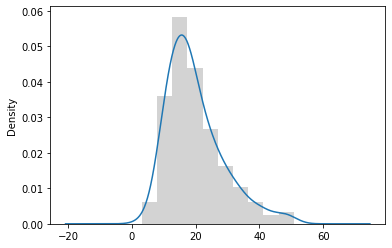

In [95]:
#tips.total_bill.hist()
#tips.total_bill.hist(bins = 20)
#tips.total_bill.plot(kind = "hist")
#tips.total_bill.plot(kind = "hist", density = True)
#tips.total_bill.plot(kind = "kde")
# A mettre ensemble pour avoir densité + histogramme sur le même graphique
tips.total_bill.plot(kind = "hist", density = True, color = "lightgrey")
tips.total_bill.plot(kind = "kde")

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

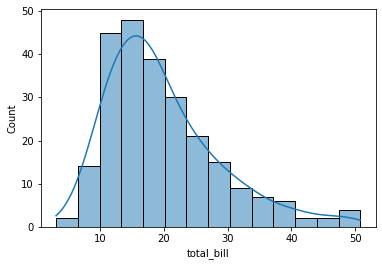

In [102]:
#seaborn.histplot(tips.total_bill)
#seaborn.histplot(data = tips, x = "total_bill")
#seaborn.histplot(data = tips, x = "total_bill", bins = 20)
#seaborn.histplot(data = tips, x = "total_bill", bins = [0, 10, 15, 20, 25, 60], stat = "density")
seaborn.histplot(data = tips, x = "total_bill", kde = True)

<AxesSubplot:>

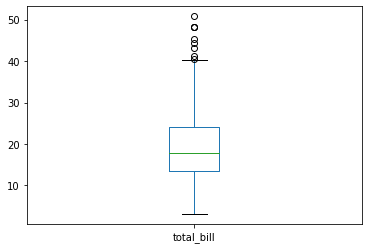

In [106]:
#tips.boxplot()
#tips.boxplot(column = "total_bill")
tips.boxplot(column = "total_bill", grid = False)

<AxesSubplot:xlabel='total_bill'>

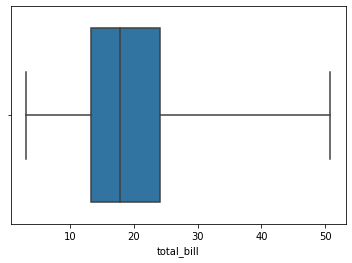

In [111]:
#seaborn.boxplot(x = "total_bill", data = tips)
#seaborn.boxplot(y = "total_bill", data = tips)
seaborn.boxplot(x = "total_bill", data = tips, whis = 3)

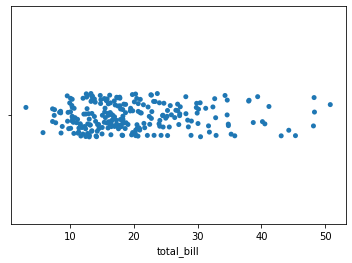

In [121]:
#seaborn.pointplot(x = "total_bill", data = tips)
#seaborn.violinplot(x = "total_bill", data = tips)
seaborn.stripplot(x = "total_bill", data = tips, jitter = True)
matplotlib.pyplot.savefig('save_as_a_png.png')

In [128]:
#tips.sex.describe()
#tips.sex.unique()
#tips.sex.value_counts()
pandas.crosstab(tips.sex, "freq")
pandas.crosstab(tips.sex, "freq", normalize = True) # Proportion

col_0,freq
sex,
Female,0.356557
Male,0.643443


In [129]:
t = pandas.crosstab(tips.sex, "freq", normalize=True)
scipy.stats.chisquare(t.freq)

Power_divergenceResult(statistic=0.08230314431604406, pvalue=0.774200187925369)

<AxesSubplot:xlabel='sex'>

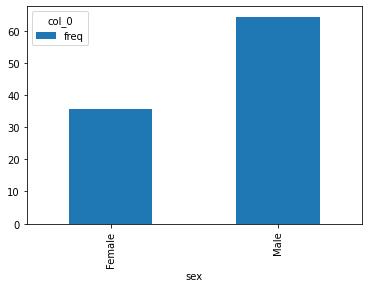

In [133]:
#t = pandas.crosstab(tips.sex, "freq")
#t.plot.bar()
#t.plot(kind = "bar")
# En proportion
t = pandas.crosstab(tips.sex, "freq", normalize=True)
#t.plot(kind = "bar")
# En pourcentage
(t * 100).plot(kind = "bar")

<AxesSubplot:xlabel='sex', ylabel='freq'>

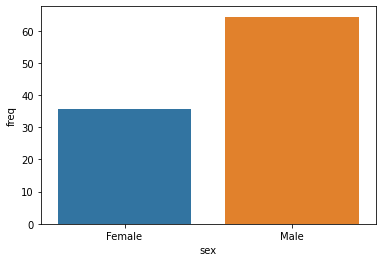

In [138]:
#seaborn.countplot(x = "sex", data = tips)

# En pourcentage
t = pandas.crosstab(tips.sex, "freq", normalize=True)
t = t.assign(sex = t.index, freq = 100 * t.freq)
seaborn.barplot(x = "sex", y = "freq", data = t)

array([<AxesSubplot:ylabel='freq'>], dtype=object)

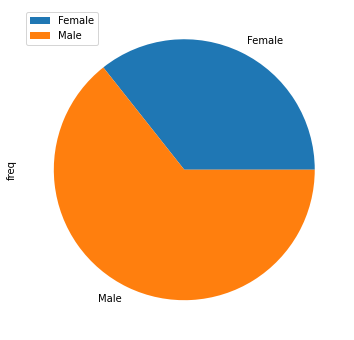

In [139]:
t = pandas.crosstab(tips.sex, "freq")
t.plot.pie(subplots = True, figsize = (6, 6))

In [141]:
tips.corr()
#tips.total_bill.cov(tips.tip)
#tips.total_bill.corr(tips.tip)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


/usr/local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='total_bill', ylabel='total_bill'>,
        <AxesSubplot:xlabel='tip', ylabel='total_bill'>,
        <AxesSubplot:xlabel='size', ylabel='total_bill'>],
       [<AxesSubplot:xlabel='total_bill', ylabel='tip'>,
        <AxesSubplot:xlabel='tip', ylabel='tip'>,
        <AxesSubplot:xlabel='size', ylabel='tip'>],
       [<AxesSubplot:xlabel='total_bill', ylabel='size'>,
        <AxesSubplot:xlabel='tip', ylabel='size'>,
        <AxesSubplot:xlabel='size', ylabel='size'>]], dtype=object)

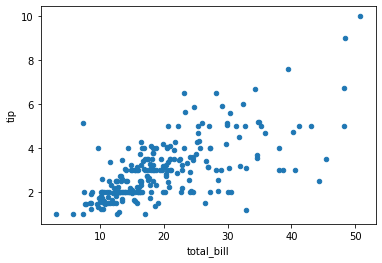

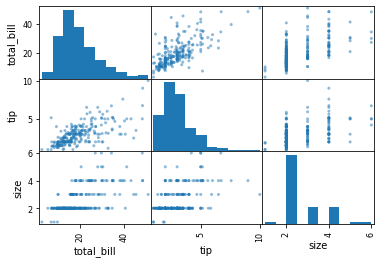

In [142]:
tips.plot.scatter("total_bill", "tip")
pandas.plotting.scatter_matrix(tips)

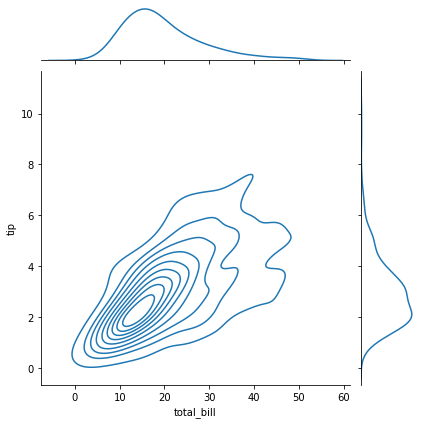

In [146]:
#seaborn.jointplot(x = "total_bill", y = "tip", data = tips)
#seaborn.jointplot(x = "total_bill", y = "tip", data = tips, kind = "reg")
#seaborn.jointplot(x = "total_bill", y = "tip", data = tips, kind = "hex")
seaborn.jointplot(x = "total_bill", y = "tip", data = tips, kind = "kde")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

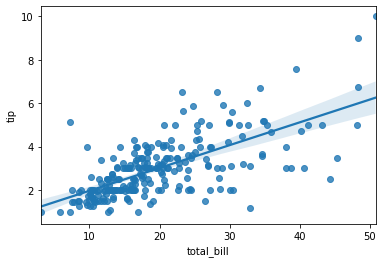

In [147]:
seaborn.regplot(x = "total_bill", y = "tip", data = tips)
#seaborn.regplot(x = "total_bill", y = "tip", data = tips, fit_reg = False)
#seaborn.regplot(x = "total_bill", y = "tip", data = tips, scatter = False)

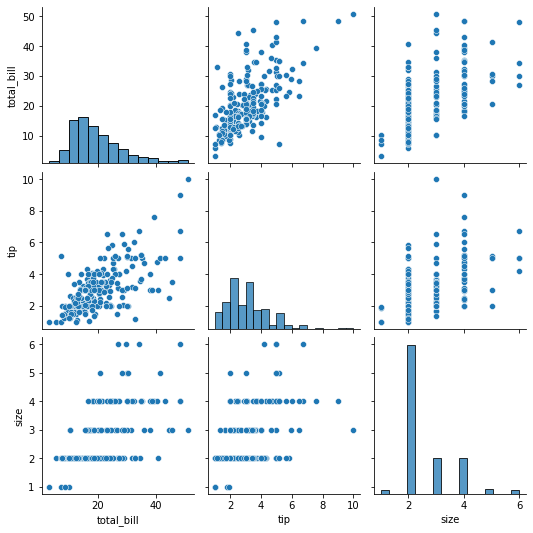

In [148]:
seaborn.pairplot(data = tips, vars = ["total_bill", "tip", "size"])

In [159]:
#pandas.crosstab(tips.sex, tips.smoker)
#pandas.crosstab(tips.sex, tips.smoker, margins = True)
pandas.crosstab(tips.sex, tips.smoker, normalize = True).round(2)

smoker,No,Yes
sex,,
Female,0.22,0.14
Male,0.40,0.25


In [156]:
pandas.crosstab(tips.sex, tips.smoker, normalize = "index").round(2)
pandas.crosstab(tips.sex, tips.smoker, normalize = "index", margins = True).round(2)

smoker,No,Yes
sex,,
Female,0.62,0.38
Male,0.62,0.38
All,0.62,0.38


In [158]:
#pandas.crosstab(tips.sex, tips.smoker, normalize = "columns").round(2)
pandas.crosstab(tips.sex, tips.smoker, normalize = "columns", margins = True).round(2)

smoker,No,Yes,All
sex,,,
Female,0.36,0.35,0.36
Male,0.64,0.65,0.64


/usr/local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([<AxesSubplot:ylabel='No'>, <AxesSubplot:ylabel='Yes'>],
      dtype=object)

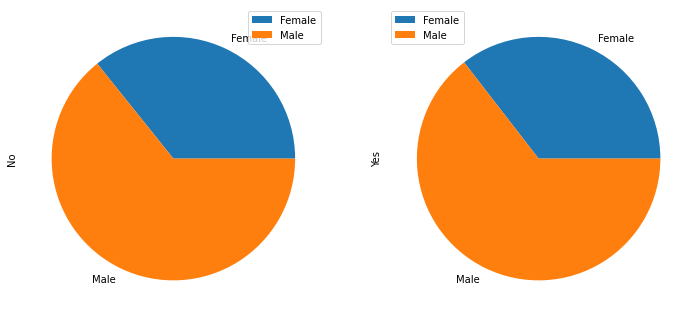

In [163]:
#t = pandas.crosstab(tips.sex, tips.smoker)
#t.plot.bar()
#t = pandas.crosstab(tips.sex, tips.smoker, normalize=True)
#t.plot.bar()
#t = pandas.crosstab(tips.sex, tips.smoker, normalize="index")
#t.plot.bar(stacked=True)
t = pandas.crosstab(tips.sex, tips.smoker)
t.plot.pie(subplots=True, figsize = (12, 6))

<AxesSubplot:xlabel='sex', ylabel='count'>

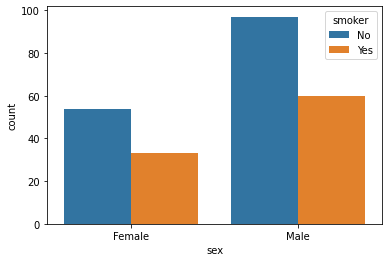

In [164]:
seaborn.countplot(x = "sex", hue = "smoker", data = tips)
#t = pandas.crosstab(tips.sex, tips.smoker, normalize = "columns")
#t = t.assign(sex = t.index)
#tm = pandas.melt(t, id_vars = "sex")
#tm = tm.assign(value = 100 * tm.value)
#seaborn.catplot(x = "sex", y = "value", col = "smoker", data = tm, kind = "bar")

In [169]:
pandas.crosstab(tips["size"], "freq")

col_0,freq
size,
1,4
2,156
3,38
4,37
5,5
6,4


## Bivarié

In [172]:
#tips.groupby("sex").mean()
tips.groupby("sex")["total_bill"].agg([numpy.mean, numpy.std, numpy.median, numpy.min, numpy.max])

,mean,std,median,amin,amax
sex,,,,,
Female,18.056897,8.009209,16.40,3.07,44.30
Male,20.744076,9.246469,18.35,7.25,50.81


<AxesSubplot:title={'center':'total_bill'}, xlabel='sex'>

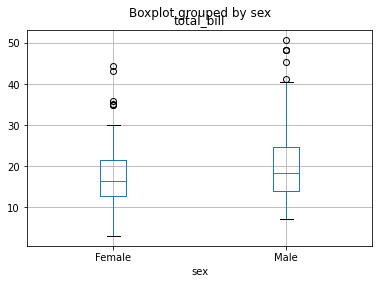

In [175]:
#tips.hist(column = "total_bill", by = "sex")
#tips.boxplot(by = "sex")
#tips.boxplot(column = "total_bill", by = "sex")

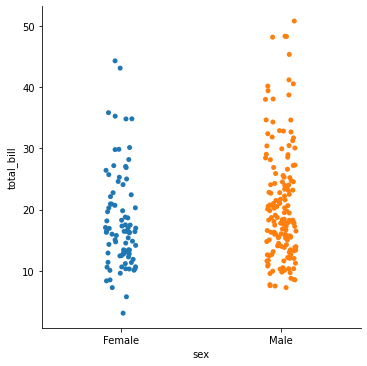

In [180]:
#p = seaborn.FacetGrid(tips, row = "sex")
#p.map(seaborn.distplot, "total_bill")
#seaborn.catplot(x = "sex", y = "total_bill", data = tips, kind = "box")
#seaborn.catplot(x = "sex", y = "total_bill", data = tips, kind = "point", join = False)
#seaborn.catplot(x = "sex", y = "total_bill", data = tips, kind = "violin")
seaborn.catplot(x = "sex", y = "total_bill", data = tips, kind = "strip")

In [184]:
#seaborn.catplot(y = "total_bill", data = tips, kind = "box")
#seaborn.catplot(x = "total_bill", data = tips, kind = "point")
#seaborn.catplot(x = "total_bill", data = tips, kind = "violin")
#seaborn.catplot(x = "total_bill", data = tips, kind = "strip", jitter = True)
#seaborn.catplot(x = "sex", data = tips, kind = "count")
#seaborn.catplot(x = "sex", hue = "smoker", data = tips, kind = "count")
#seaborn.catplot(x = "sex", col = "smoker", data = tips, kind = "count")

<AxesSubplot:xlabel='size', ylabel='total_bill'>

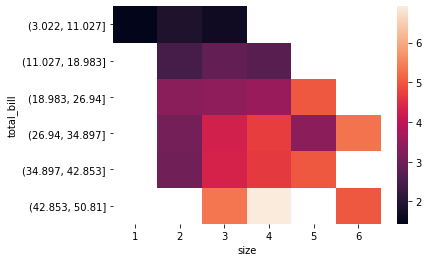

In [185]:
t = pandas.crosstab(pandas.cut(tips.total_bill, bins = 6),
                    tips["size"],
                    values = tips.tip, aggfunc = numpy.mean)
seaborn.heatmap(t)

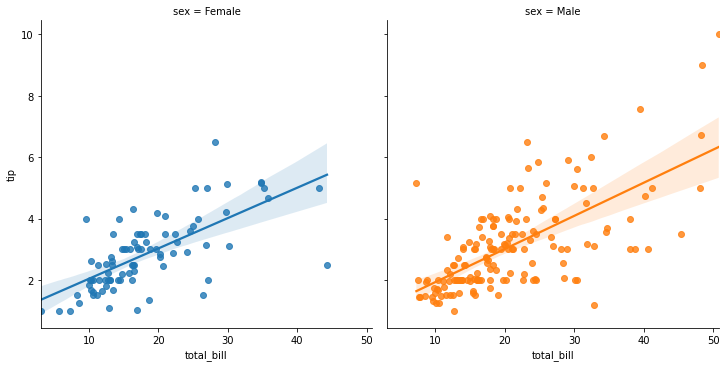

In [186]:
seaborn.lmplot(x = "total_bill", y = "tip", hue = "sex", col = "sex", data = tips)

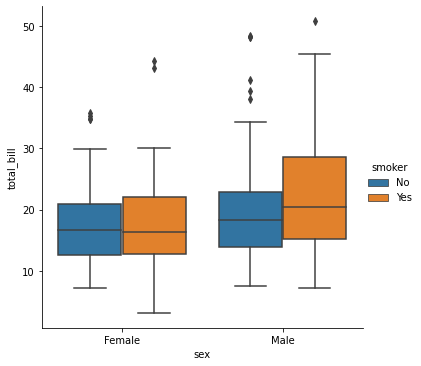

In [188]:
#p = seaborn.FacetGrid(tips, row = "sex", col = "smoker")
#p.map(seaborn.histplot, "total_bill")

seaborn.catplot(x = "sex", y = "total_bill", hue = "smoker", data = tips, kind = "box")
#seaborn.catplot(x = "sex", y = "total_bill", hue = "sex", col = "smoker", data = tips, 
#                   kind = "point", join = False)
#seaborn.catplot(x = "sex", y = "total_bill", hue = "smoker", data = tips, kind = "violin")
#seaborn.catplot(x = "sex", y = "total_bill", hue = "smoker", col = "smoker", data = tips, 
#                   kind = "strip", jitter = True)

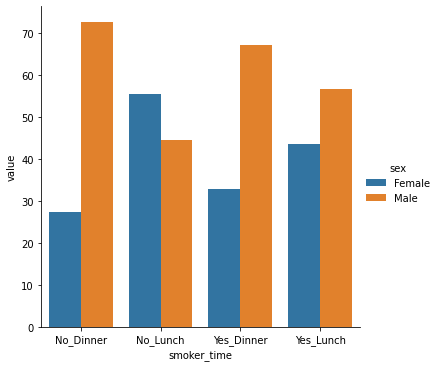

In [191]:
#seaborn.catplot(x = "sex", row = "smoker", col = "time", data = tips, kind = "count")
#seaborn.catplot(x = "sex", hue = "smoker", col = "time", data = tips, kind = "count")
t = pandas.crosstab([tips.smoker, tips.time], tips.sex, normalize = "index")
t = t.reset_index().assign(smoker_time = lambda x: x.smoker + "_" + x.time).drop(columns = ["smoker", "time"])
tm = pandas.melt(t, id_vars = "smoker_time")
tm = tm.assign(value = 100 * tm.value)
seaborn.catplot(x = "smoker_time", y = "value", hue = "sex", data = tm, kind = "bar")

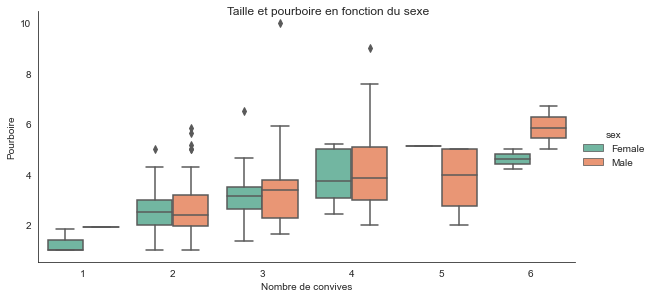

In [192]:
seaborn.set_style("white")
p = seaborn.catplot(x = "size", y = "tip", hue = "sex", data = tips, kind = "box", 
                    palette = "Set2", height = 4, aspect = 2)
p.fig.suptitle("Taille et pourboire en fonction du sexe")
p.set_axis_labels("Nombre de convives", "Pourboire")